In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def parse_stream(stream_id):
    df = pd.read_csv('frame2.csv', chunksize=10000000)
    frame_df = None
    for chunk in df:
        filtered = chunk.loc[chunk['stream_id'] == stream_id]
        if frame_df == None:
            frame_df = filtered
            continue
        pd.concat([filtered, frame_df])

    df = pd.read_csv('inplace2.csv', chunksize=10000000)
    inplace_df = None
    for chunk in df:
        filtered = chunk.loc[chunk['stream_id'] == stream_id]
        if inplace_df == None:
            inplace_df = filtered
            continue
        pd.concat([filtered, inplace_df])
    
    del frame_df['stream_id']
    del inplace_df['stream_id']
    merged_df = pd.merge(frame_df, inplace_df, 'inner', 'sequence_no', suffixes=['_frame', '_inplace'])
    assert np.all(merged_df['exanic_timestamp_frame'] == merged_df['exanic_timestamp_inplace'])
    del merged_df['exanic_timestamp_frame']
    merged_df.rename({'exanic_timestamp_inplace' : 'exanic_timestamp'})

    merged_df['gap'] = merged_df.apply(lambda row: row.index_inplace - row.index_frame, axis=1)
    return merged_df

stream 1


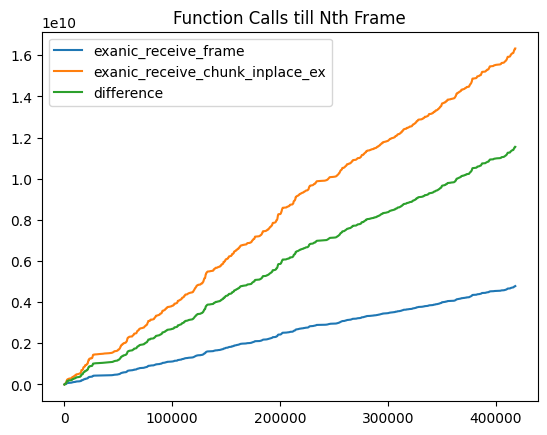

System Clock Difference on frame receive (exanic_receive_frame - exanic_receive_chunk_inplace_ex)
count    418373.000000
mean         40.389485
std         130.364521
min       -6190.000000
25%          22.000000
50%          43.000000
75%          57.000000
max        7148.000000
dtype: float64

stream 2


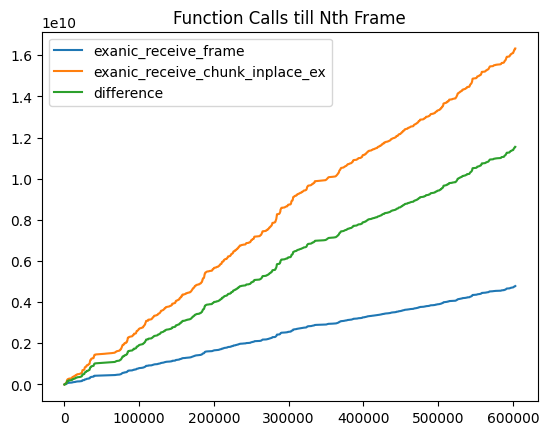

System Clock Difference on frame receive (exanic_receive_frame - exanic_receive_chunk_inplace_ex)
count    603221.000000
mean         39.436205
std         198.383635
min      -47551.000000
25%          22.000000
50%          44.000000
75%          57.000000
max        6830.000000
dtype: float64

stream 3


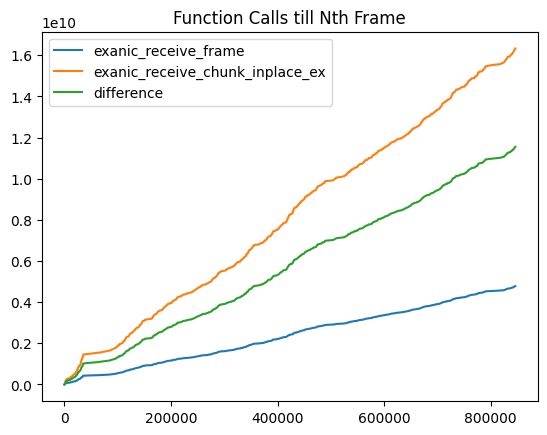

System Clock Difference on frame receive (exanic_receive_frame - exanic_receive_chunk_inplace_ex)
count    845955.000000
mean         42.410037
std         121.278573
min       -7101.000000
25%          26.000000
50%          45.000000
75%          60.000000
max        6758.000000
dtype: float64

stream 4


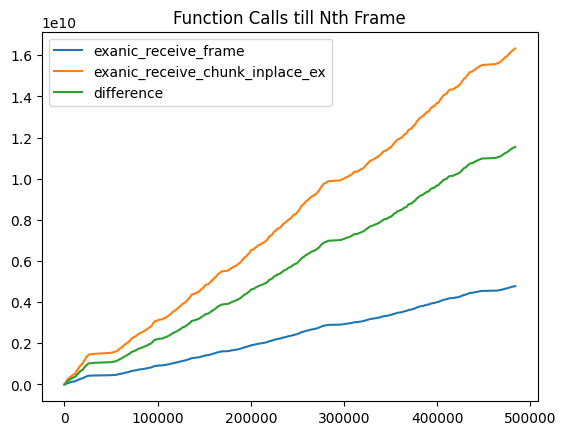

System Clock Difference on frame receive (exanic_receive_frame - exanic_receive_chunk_inplace_ex)
count    483909.000000
mean         42.335892
std         118.188700
min       -6490.000000
25%          26.000000
50%          45.000000
75%          60.000000
max        6418.000000
dtype: float64

stream 5


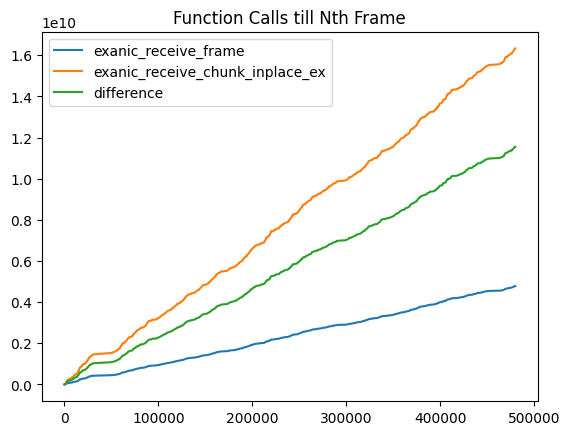

System Clock Difference on frame receive (exanic_receive_frame - exanic_receive_chunk_inplace_ex)
count    479834.000000
mean         42.546181
std         130.192391
min       -7481.000000
25%          26.000000
50%          45.000000
75%          60.000000
max        6483.000000
dtype: float64

stream 6


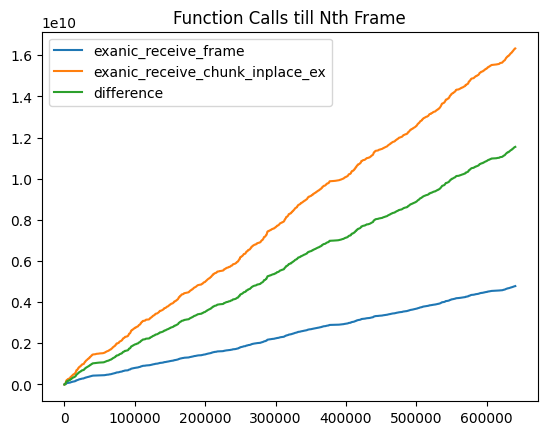

System Clock Difference on frame receive (exanic_receive_frame - exanic_receive_chunk_inplace_ex)
count    640757.000000
mean         42.697038
std         137.973596
min      -34908.000000
25%          26.000000
50%          45.000000
75%          61.000000
max        7117.000000
dtype: float64

stream 7


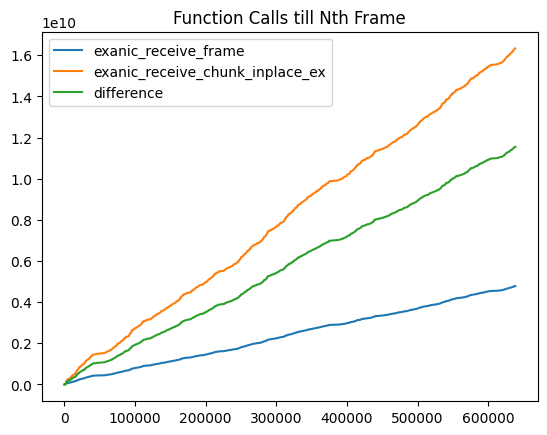

System Clock Difference on frame receive (exanic_receive_frame - exanic_receive_chunk_inplace_ex)
count    638182.000000
mean         42.640353
std         132.707125
min       -7528.000000
25%          26.000000
50%          45.000000
75%          61.000000
max        7098.000000
dtype: float64

stream 8


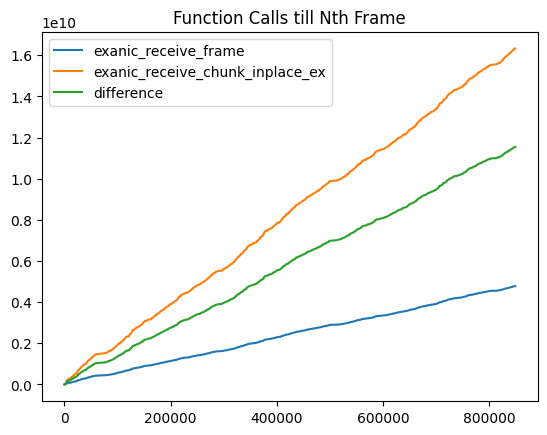

System Clock Difference on frame receive (exanic_receive_frame - exanic_receive_chunk_inplace_ex)
count    848766.000000
mean         42.885356
std         127.520916
min       -6523.000000
25%          26.000000
50%          45.000000
75%          61.000000
max        7506.000000
dtype: float64

stream 9


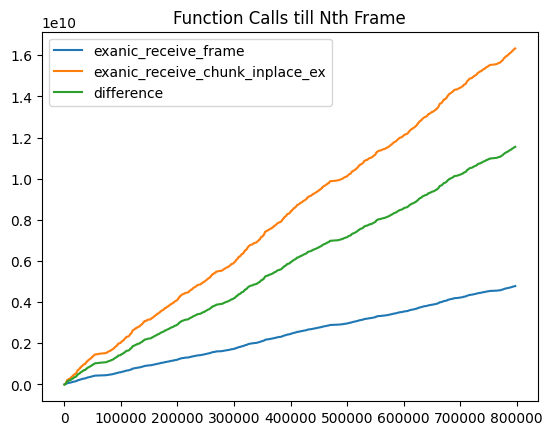

System Clock Difference on frame receive (exanic_receive_frame - exanic_receive_chunk_inplace_ex)
count    797585.000000
mean         42.826054
std         143.990854
min      -42615.000000
25%          26.000000
50%          45.000000
75%          61.000000
max        7315.000000
dtype: float64

stream 10


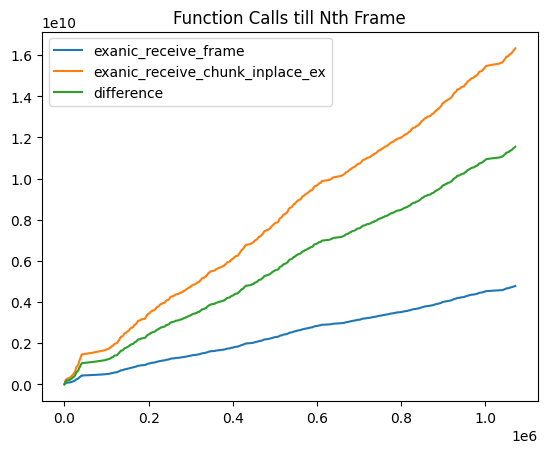

System Clock Difference on frame receive (exanic_receive_frame - exanic_receive_chunk_inplace_ex)
count    1.071141e+06
mean     4.258673e+01
std      1.141514e+02
min     -1.625900e+04
25%      2.600000e+01
50%      4.500000e+01
75%      6.000000e+01
max      7.027000e+03
dtype: float64

stream 11


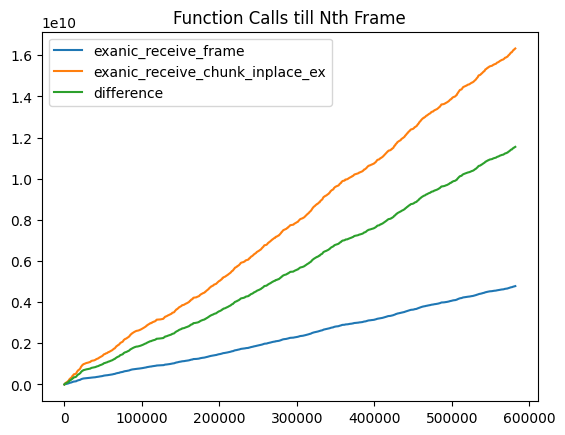

System Clock Difference on frame receive (exanic_receive_frame - exanic_receive_chunk_inplace_ex)
count    582014.000000
mean         42.573335
std          97.950959
min       -4738.000000
25%          26.000000
50%          45.000000
75%          60.000000
max        8112.000000
dtype: float64

stream 12


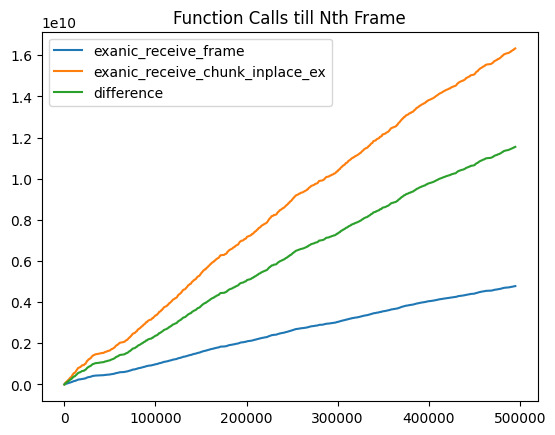

System Clock Difference on frame receive (exanic_receive_frame - exanic_receive_chunk_inplace_ex)
count    495141.000000
mean         42.427343
std          95.577459
min       -6624.000000
25%          26.000000
50%          45.000000
75%          60.000000
max        6256.000000
dtype: float64

stream 13


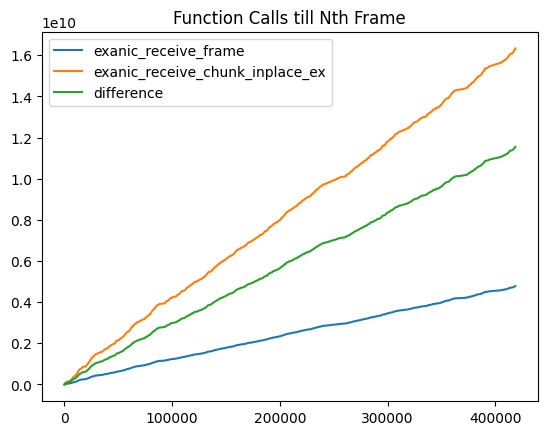

System Clock Difference on frame receive (exanic_receive_frame - exanic_receive_chunk_inplace_ex)
count    418507.000000
mean         41.912833
std         131.782531
min      -39417.000000
25%          26.000000
50%          45.000000
75%          60.000000
max        6140.000000
dtype: float64

stream 14


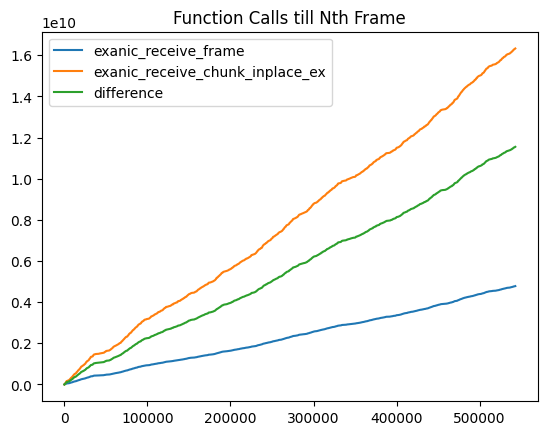

System Clock Difference on frame receive (exanic_receive_frame - exanic_receive_chunk_inplace_ex)
count    543000.000000
mean         42.427843
std          99.443949
min       -4976.000000
25%          26.000000
50%          45.000000
75%          60.000000
max        5227.000000
dtype: float64

stream 15


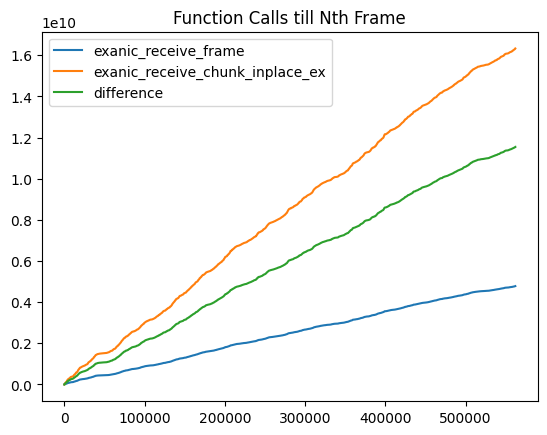

System Clock Difference on frame receive (exanic_receive_frame - exanic_receive_chunk_inplace_ex)
count    561860.000000
mean         42.663284
std          97.194918
min       -6095.000000
25%          26.000000
50%          45.000000
75%          60.000000
max        6078.000000
dtype: float64

stream 16


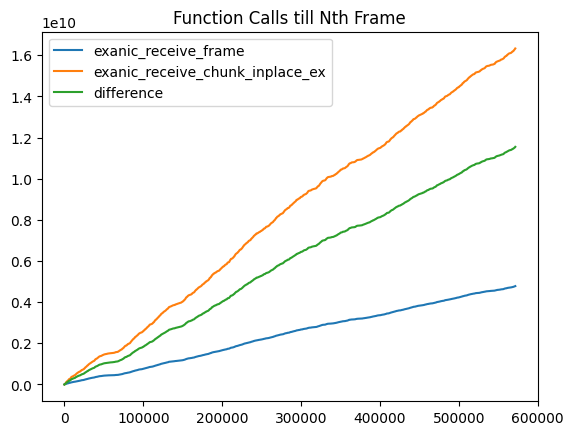

System Clock Difference on frame receive (exanic_receive_frame - exanic_receive_chunk_inplace_ex)
count    571678.000000
mean         42.412012
std          99.151169
min      -13348.000000
25%          26.000000
50%          45.000000
75%          60.000000
max        7386.000000
dtype: float64



In [4]:
for i in range(1, 17):
    print(f"stream {i}")
    merged_df = parse_stream(i)
    sequence_diff = merged_df['sequence_no'].diff()
    sequence_diff = sequence_diff.drop(0)
    if np.all(sequence_diff == 1) == False:
        print("Packets lost")
    ax = merged_df['index_frame'].plot(title='Function Calls till Nth Frame', legend=True)
    merged_df['index_inplace'].plot(legend=True)
    merged_df['gap'].plot(legend=True)
    ax.legend(['exanic_receive_frame', 'exanic_receive_chunk_inplace_ex', 'difference'])
    plt.show()
    call_latencies = merged_df['system_timestamp_frame'] - merged_df['system_timestamp_inplace']
    print('System Clock Difference on frame receive (exanic_receive_frame - exanic_receive_chunk_inplace_ex)')
    print(call_latencies.describe())
    print()
    plt.show()